%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install tensorflow

In [3]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('modified5050_card_transdata.csv')

fraud_count = df[df['fraud'] != 0].shape[0]
print(f"Fraud Count {fraud_count}")

df.tail()

Fraud Count 87403


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
174800,4.421777,566.926046,2.093019,1,1,1,1,0
174801,39.628811,6.900791,0.226182,1,0,0,0,0
174802,9.027388,0.067260,1.744743,1,1,0,1,0
174803,2.177936,0.212883,2.001168,1,0,0,0,0
174804,24.709860,28.943255,1.962611,1,0,0,0,0


In [4]:
length_before = df.shape[0]
print(f"Length before: {length_before}")

## drop duplicates
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

length_after = df.shape[0]

print(f"Length after {length_after}")

Length before: 174805
Duplicated values dropped succesfully
Length after 174805


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(["fraud"], axis=1)
y = df["fraud"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [6]:
len(X_val) + len(X_train) + len(X_test)

174805

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=7))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.summary()

C:\Users\trp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8766 - loss: 0.3773 - val_accuracy: 0.9695 - val_loss: 0.1076
Epoch 2/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9648 - loss: 0.1141 - val_accuracy: 0.9734 - val_loss: 0.0802
Epoch 3/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9698 - loss: 0.0864 - val_accuracy: 0.9774 - val_loss: 0.0657
Epoch 4/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9741 - loss: 0.0771 - val_accuracy: 0.9783 - val_loss: 0.0596
Epoch 5/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9748 - loss: 0.0683 - val_accuracy: 0.9839 - val_loss: 0.0500
Epoch 6/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9775 - loss: 0.0619 - val_accuracy: 0.9837 - val_loss: 0.0456
Epoch 7/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9809 - loss: 0.0549 - val_accuracy: 0.9850 - val_loss: 0.0412
Epoch 8/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0

[]

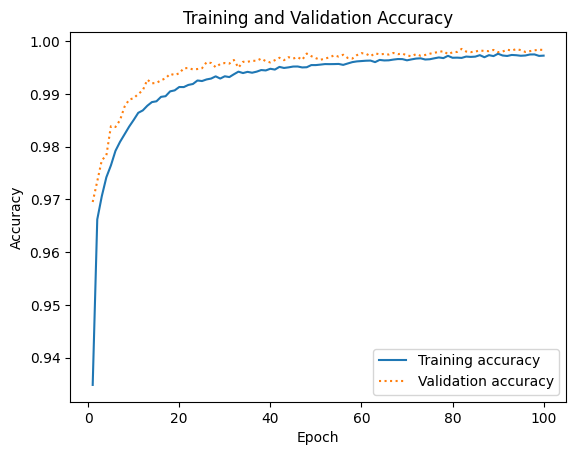

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

acc = history.history["accuracy"]
val = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

2186/2186 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Text(113.9222222222222, 0.5, 'Actual label')

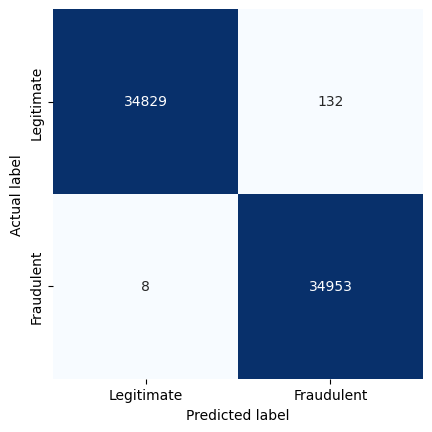

In [10]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [11]:
true_legitimate = 0
true_fraudulent = 0
false_legitimate = 0
false_fraudulent = 0

for i in range(0, len(y_predicted)):
    if y_predicted[i] and y_test.iloc[i]:
        true_fraudulent+=1
    elif y_predicted[i] and (not y_test.iloc[i]):
        false_fraudulent+=1
    elif (not y_predicted[i]) and y_test.iloc[i]:
        false_legitimate+=1
    elif (not y_predicted[i]) and (not y_test.iloc[i]):
        true_legitimate+=1
        

true_legitimate

34829

In [12]:
print('true legitimate: ' + str(true_legitimate))
print('true fraudulent: ' + str(true_fraudulent))
print('false legitimate: ' + str(false_legitimate))
print('false fraudulent: ' + str(false_fraudulent))

true legitimate: 34829
true fraudulent: 34953
false legitimate: 8
false fraudulent: 132


In [13]:
test_acc = (true_legitimate + true_fraudulent)/len(y_test)
print(test_acc)

0.997997768942536


# Random Forest Classifer Model

## Train a Random Forest Classifier Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train a Logistic Regression classifier
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

### Test model against test dataset

In [15]:
y_train_pred = forest_classifier.score(X_test, y_test)

print(y_train_pred)

0.9999141900975372


Text(113.9222222222222, 0.5, 'Actual label')

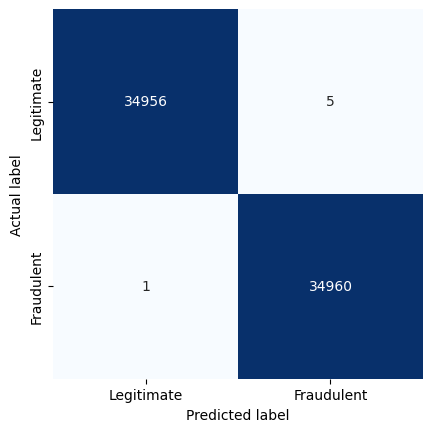

In [16]:
from sklearn.metrics import confusion_matrix
 
y_predicted = forest_classifier.predict(X_test)
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### Test against "entire" dataset

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Read the data from the CSV file
df_full = pd.read_csv('card_transdata.csv')

X_full = df_full.drop(["fraud"], axis=1)
y_full = df_full["fraud"]

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, train_size=10, random_state=42, stratify=y_full)

# normalize data
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

In [34]:
X_train_full.shape

(10, 7)

In [35]:
X_train_full[:10]

array([[ 0.5239583 , -0.93222383, -0.41008652,  0.        ,  0.81649658,
        -0.5       ,  0.65465367],
       [-0.70096153,  1.19374401,  2.11749761,  0.        ,  0.81649658,
        -0.5       ,  0.65465367],
       [-0.60429824,  0.13510581, -0.46736465,  0.        , -1.22474487,
        -0.5       ,  0.65465367],
       [-0.07784129,  0.55941039, -0.32695689,  0.        , -1.22474487,
         2.        , -1.52752523],
       [-0.64349647, -0.86860814, -0.81830977,  0.        ,  0.81649658,
        -0.5       , -1.52752523],
       [ 2.75911701, -0.62531923,  1.74784794,  0.        ,  0.81649658,
         2.        , -1.52752523],
       [-0.60168185, -1.03500755,  0.05513951,  0.        ,  0.81649658,
        -0.5       ,  0.65465367],
       [ 0.20763302,  2.02224221, -0.49223687,  0.        , -1.22474487,
        -0.5       ,  0.65465367],
       [-0.25939156,  0.47087728, -0.52248238,  0.        ,  0.81649658,
        -0.5       ,  0.65465367],
       [-0.6030374 , -0.9202

In [36]:
X_test_full.shape

(999990, 7)

In [37]:
X_test_full[:10]

array([[-0.16362465,  1.0155339 , -0.72682258,  0.        , -1.22474487,
        -0.5       ,  0.65465367],
       [-0.57903821,  2.62230779, -0.34345062,  0.        , -1.22474487,
        -0.5       ,  0.65465367],
       [-0.57698298, -0.84418547, -0.75682775,  0.        , -1.22474487,
        -0.5       , -1.52752523],
       [-0.75032363,  9.37187265, -0.80067685, -1.        ,  0.81649658,
        -0.5       ,  0.65465367],
       [-0.37954318,  1.37082605, -0.52890988,  0.        ,  0.81649658,
        -0.5       ,  0.65465367],
       [-0.53078967, -1.02034257, -0.16318826,  0.        ,  0.81649658,
        -0.5       ,  0.65465367],
       [-0.69311847, 13.92286191, -0.57795873,  0.        , -1.22474487,
        -0.5       ,  0.65465367],
       [-0.6610819 , -0.97925665, -0.62653372,  0.        ,  0.81649658,
        -0.5       ,  0.65465367],
       [ 1.73795382, -0.96008404, -0.15945848,  0.        , -1.22474487,
         2.        , -1.52752523],
       [-0.66079966, -0.9629

In [38]:
y_train_pred = forest_classifier.score(X_test_full, y_test_full)

print(y_train_pred)

0.8355273552735527


Text(113.9222222222222, 0.5, 'Actual label')

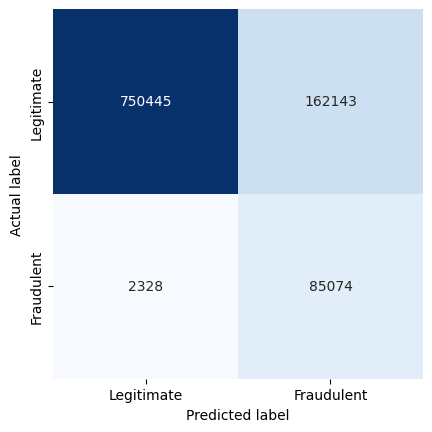

In [39]:
from sklearn.metrics import confusion_matrix
 
y_predicted = forest_classifier.predict(X_test_full)
mat = confusion_matrix(y_test_full, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step


Text(113.9222222222222, 0.5, 'Actual label')

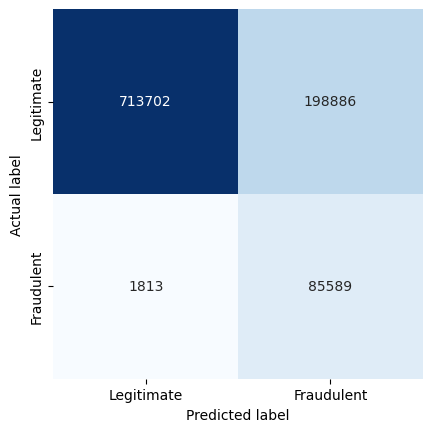

In [40]:
y_predicted = model.predict(X_test_full) > 0.5
mat = confusion_matrix(y_test_full, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')